In [ ]:
#HYPOTHESIS: In Los Angeles, a given restaurant's Yelp Rating implies that restaurant's Health Score

In [97]:
import pandas as pd
import scipy.stats as stats

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import os

In [98]:
#import merged_csv to dataframe
file_in = os.path.join("data (raw)","raw_all_restaurants.csv")
df = pd.read_csv(file_in)

In [99]:
#drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'index', 'serial_number', 'activity_date', 'facility_name', 'grade', 'service_code', 'service_description', 'employee_id', 'facility_address', 'program_status', 'facility_city', 'facility_state', 'owner_id', 'owner_name', 'pe_description', 'program_element_pe', 'program_name', 'record_id', 'food_type', 'in_business', 'review_count', 'yelp_id'])
#drop repeat entries
df = df.drop_duplicates()

In [100]:
#file_out_byzip = os.path.join('topological_mapping', 'clean_mean_scores_byzip.csv')
file_out_data = os.path.join('topological_mapping', 'clean.csv')
#zip_mean_df.to_csv(file_out_byzip)
df.to_csv(file_out_data)

In [101]:
#calculate linear regression statistics
lin_reg_re = stats.linregress(df['score'], df['rating'])

#create line of best fit
predicted_yelp_score = lin_reg_re.slope * df['score'] + lin_reg_re.intercept

<IPython.core.display.Javascript object>


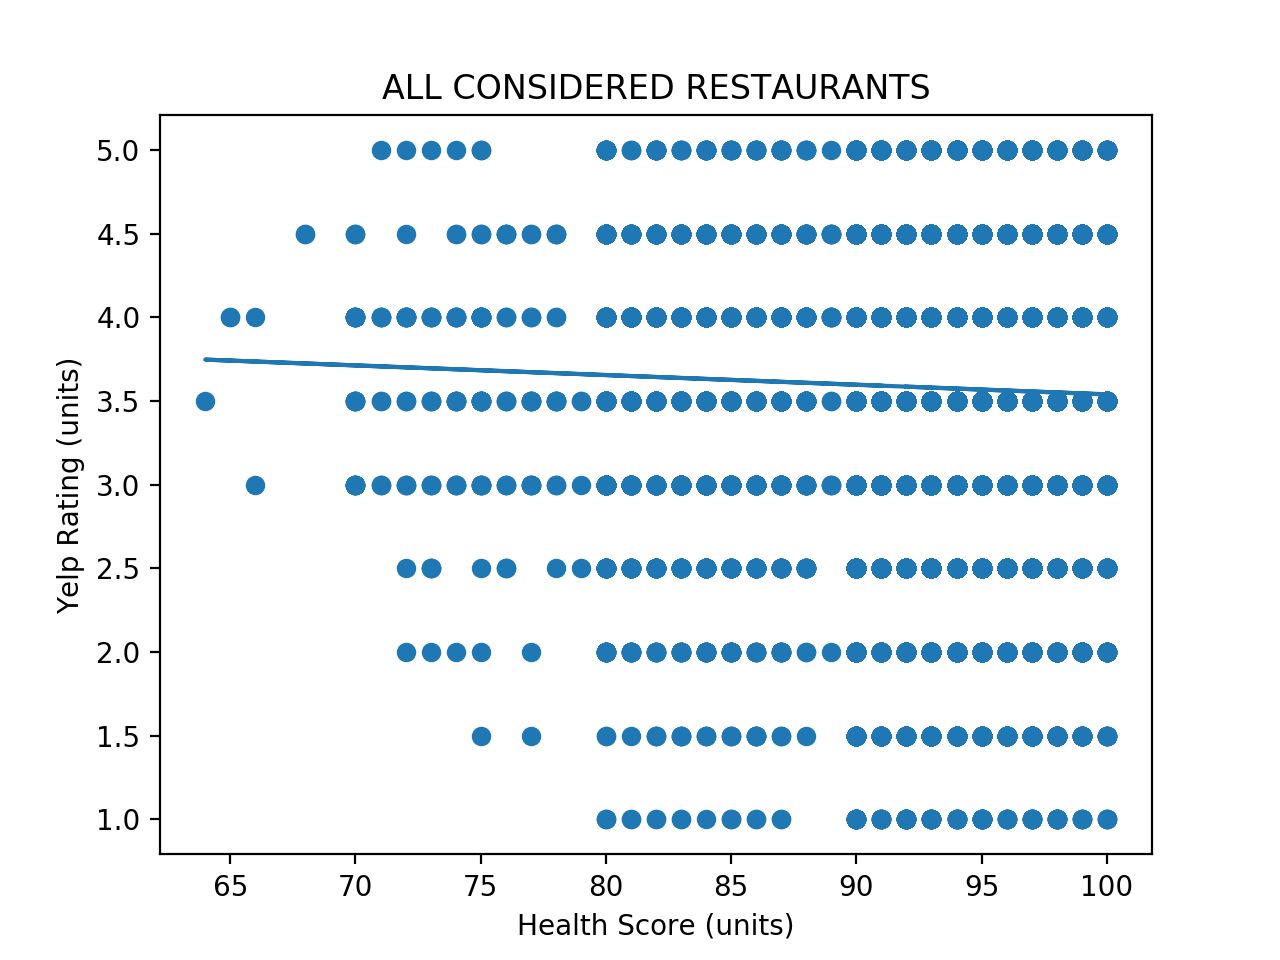

In [102]:
#PLOT!!!

#set axes
plt_x = df['score']
plt_y = df['rating']


#scatter plot of data
plt.scatter(df['score'], df['rating'], marker='o')

#line of best fit
plt.plot(df['score'], predicted_yelp_score)

#labels & aesthetics
plt.xlabel(r"Health Score (units)")
plt.ylabel(r"Yelp Rating (units)")
plt.title(r"ALL CONSIDERED RESTAURANTS")

plt.show()

plt.savefig('stat_exploration/scatter_and_lineofbestfit.png')

In [ ]:
#STATISTICAL ANALYSIS

In [103]:
##### NOT A T TEST PROBLEM
#run T test
#stats.ttest_ind(df['score'], df['rating'], equal_var=False)

In [104]:
# CHI SQUARED TEST
expected_unscaled = df['score']
observed = df['rating']

sum_expected = 0
for x in df['score']:
    sum_expected += x

sum_observed = 0
for x in df['rating']:
    sum_observed += x
    
degrees_of_freedom = 0
for x in df['score']:
    degrees_of_freedom += 1
degrees_of_freedom -= 1
    
df['expected_yelp_rating'] = df['score'] * sum_observed / sum_expected
expected_scaled = df['expected_yelp_rating']

In [105]:
df[['score','rating','expected_yelp_rating']].head()

,score,rating,expected_yelp_rating
0,91,3.5,3.511477
2,81,3.5,3.125601
4,92,3.5,3.550065
5,92,4.5,3.550065
6,90,4.0,3.472890


In [115]:
critical_value = stats.chi2.ppf(q = 0.95, df = degrees_of_freedom)

In [117]:
power_div_re = stats.chisquare(observed, expected_scaled)

In [124]:
print('with ' + str(degrees_of_freedom) + ' degrees of freedom\nand a significance level of 5%\n')
print('our critical value is '+ str(critical_value))
print('our chi squared value is ' + str(power_div_re.statistic))

print('our chi squared value is far less extreme than our critical value')
print('CHI SQUARED RESULT IS NOT SIGNIFICANT\nthus: we must REJECT OUR HYPOTHESIS')

with 29432 degrees of freedom
and a significance level of 5%

our critical value is 29832.206602610433
our chi squared value is 5204.175393281761

is far less extreme than our critical value of significance
CHI SQUARED RESULT IS NOT SIGNIFICANT
thus: we must REJECT OUR HYPOTHESIS
